# Classification on Adult Dataset

In [122]:
import pandas as pd #dataset manipulation library
import numpy as np #used for turning data into array and its calculation
import matplotlib.pyplot as plt #for data visualization
import seaborn as sn #for data visualization
import warnings
from sklearn import preprocessing
from collections import Counter
from sklearn.impute import KNNImputer #for using KNN imputer
from sklearn.model_selection import train_test_split #for separating test and train data
from imblearn.over_sampling import SMOTE #for balancing the dataset by creating synthetic dataset
from sklearn.model_selection import RepeatedStratifiedKFold #for getting stable prediction and accuracy score
from sklearn.linear_model import LogisticRegression #for logistic regression algorithm
from sklearn.linear_model import RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier #random forest classifier algorithm
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
import plotly.express as px #for visualization
import plotly.graph_objects as go
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

warnings.simplefilter(action='ignore')

### Getting the Data

In [123]:
data = pd.read_csv('./salary.csv')
data.head()
print(data.columns)
print(data.shape)

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'salary'],
      dtype='object')
(32561, 15)


### Drop Duplicates

(32537, 15)


<AxesSubplot:xlabel='count', ylabel='index'>

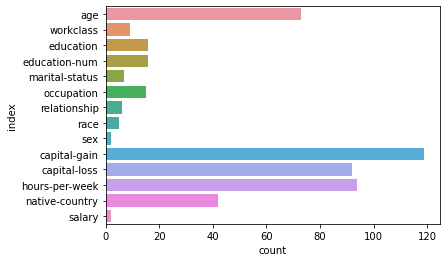

In [124]:
data.drop_duplicates(inplace=True)
print(data.shape) #removed 24 duplicates
unique_count = pd.DataFrame(data.nunique().drop('fnlwgt'),columns=['count']).reset_index()
sns.barplot(data=unique_count, x=unique_count['count'],y=unique_count['index'])

### Understanding the data 

In [125]:
print("Shape\n"+str(data.shape)+'\n')
print("Columns")
print(data.columns)
data.describe()

Shape
(32537, 15)

Columns
Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'salary'],
      dtype='object')


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32537.000000,3.253700e+04,32537.000000,32537.000000,32537.000000,32537.000000
mean,38.585549,1.897808e+05,10.081815,1078.443741,87.368227,40.440329
std,13.637984,1.055565e+05,2.571633,7387.957424,403.101833,12.346889
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.369930e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [126]:
data.corr

<bound method DataFrame.corr of        age          workclass  fnlwgt    education  education-num  \
0       39          State-gov   77516    Bachelors             13   
1       50   Self-emp-not-inc   83311    Bachelors             13   
2       38            Private  215646      HS-grad              9   
3       53            Private  234721         11th              7   
4       28            Private  338409    Bachelors             13   
...    ...                ...     ...          ...            ...   
32556   27            Private  257302   Assoc-acdm             12   
32557   40            Private  154374      HS-grad              9   
32558   58            Private  151910      HS-grad              9   
32559   22            Private  201490      HS-grad              9   
32560   52       Self-emp-inc  287927      HS-grad              9   

            marital-status          occupation    relationship    race  \
0            Never-married        Adm-clerical   Not-in-family   

In [127]:
print(sorted(Counter(data['salary']).items()))

[(' <=50K', 24698), (' >50K', 7839)]


In [128]:
fig = px.pie(values=data['salary'].value_counts(),names=['Less than or equal to 50K','More than 50K'],width=800, height=400, title="Data Check for target variable")
fig.show()

### Analysis
#### Need to use oversampling to balance the data 

### Dealing with Outliers: Box and Whisker

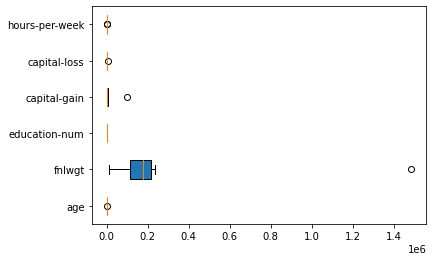

In [129]:
plt.boxplot(data.describe().iloc[1:,:],patch_artist=True,vert=0,labels=list(data.describe().columns))
plt.show()

In [130]:
print('Looking at outliers')
print("max for age",48+1.5*(48-17)) #q3+1.5*(q3-q1)
print("max for education-num",12+1.5*(16-1)) #q3+1.5*(q3-q1)
print("max for capital_gain",0+1.5*(0-0)) #q3+1.5*(q3-q1)
print("max for capital_loss",0+1.5*(0-0)) #q3+1.5*(q3-q1)
print("max for hours-per-week",45+1.5*(45-1)) #q3+1.5*(q3-q1)

Looking at outliers
max for age 94.5
max for education-num 34.5
max for capital_gain 0.0
max for capital_loss 0.0
max for hours-per-week 111.0


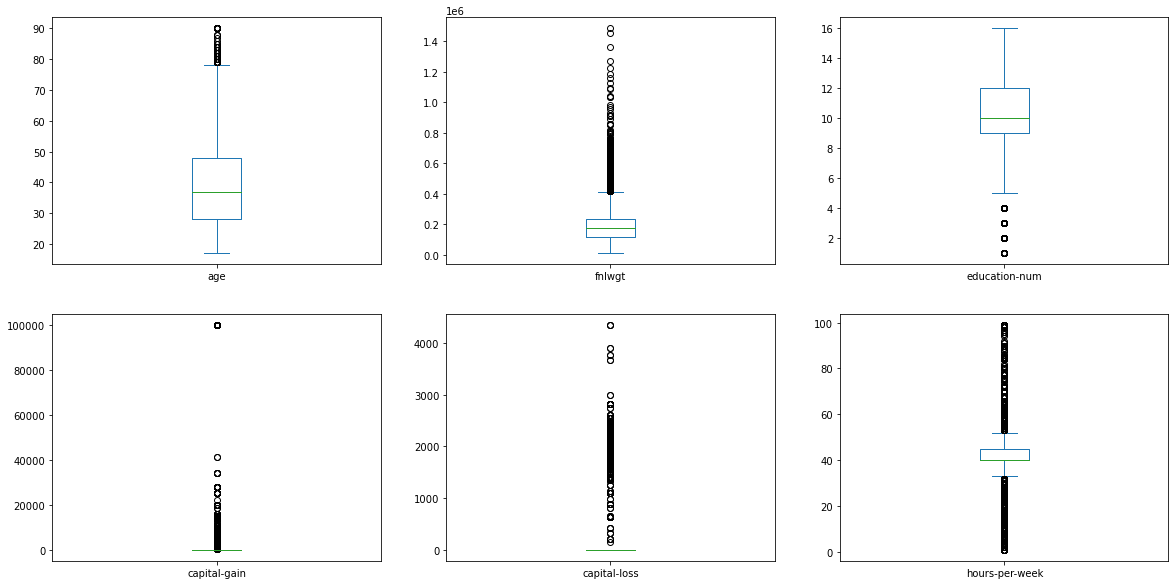

In [131]:
data.plot(kind="box", subplots=True, figsize=(20,10), layout=(2,3))
plt.show()

### Analysis

#### age: 
The min and max are reasonable and there seems no outliers. Standard deviation is small.

#### education-num: 
The min and max are reasonable and there seems no outliers. Standard deviation is small.

#### hours-per-week: 
The min and max are reasonable and there seems no outliers. Standard deviation is small.

#### capital-gain: 
Chances of getting outlier since there is a huge gap between 75% and max.

#### capital-loss: 
Chances of getting outlier since there is a huge gap between 75% and max.

#### fnlwgt: 
Looking at the boxplot, there is defintely an outlier in fnlwgt.

#### Out of 15 features, only 6 are numerical.

### Note:

#### fnlwgt — The weight assigned to the combination of features (an estimate of how many people belong to this set of combination)

(Ref: https://medium.com/analytics-vidhya/machine-learning-application-census-income-prediction-868227debf12)

#### The fnlwgt column in the adult dataset is removed for a better model. This column is a measure of how many people are in a given population, and is not a predictor of income.

In [132]:
data.drop('fnlwgt',axis=1,inplace=True) #removing fnlwgt column

In [133]:
data.dtypes

age                int64
workclass         object
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
salary            object
dtype: object

#### In-depth dealing with outliers

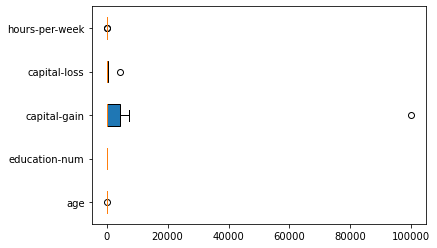

In [134]:
plt.boxplot(data.describe().iloc[1:,:],patch_artist=True,vert=0,labels=list(data.describe().columns))
plt.show()

### Looking at 'capital-gain'

In [135]:
print('Income greater than 40k:',data[data['capital-gain']>10000]['capital-gain'].unique())# finding 99999 is an outlier
data[data['capital-gain']>30000].count()

Income greater than 40k: [14084 14344 15024 34095 20051 25236 10605 99999 25124 10520 27828 13550
 15020 22040 10566 15831 41310 11678 18481]


age               166
workclass         166
education         166
education-num     166
marital-status    166
occupation        166
relationship      166
race              166
sex               166
capital-gain      166
capital-loss      166
hours-per-week    166
native-country    166
salary            166
dtype: int64

#### We know that the number '99999' is an outlier based on the fact that there are more than 158 of them (which is quite alot of a specific number in a countinous feature) and it is rather extreme compared to its 3rd quartile. Therefore, we are replacing them with N/A and treating them as missing values.

In [136]:
data['capital-gain'] = data['capital-gain'].replace(99999,np.nan)
data['capital-gain'] = data['capital-gain'].replace(41310,np.nan)
data['capital-gain'] = data['capital-gain'].replace(34095,np.nan)

In [137]:
data['capital-gain'].dtype

dtype('float64')

In [138]:
data['capital-gain'].unique()

array([ 2174.,     0., 14084.,  5178.,  5013.,  2407., 14344., 15024.,
        7688.,    nan,  4064.,  4386.,  7298.,  1409.,  3674.,  1055.,
        3464.,  2050.,  2176.,   594., 20051.,  6849.,  4101.,  1111.,
        8614.,  3411.,  2597., 25236.,  4650.,  9386.,  2463.,  3103.,
       10605.,  2964.,  3325.,  2580.,  3471.,  4865.,  6514.,  1471.,
        2329.,  2105.,  2885., 25124., 10520.,  2202.,  2961., 27828.,
        6767.,  2228.,  1506., 13550.,  2635.,  5556.,  4787.,  3781.,
        3137.,  3818.,  3942.,   914.,   401.,  2829.,  2977.,  4934.,
        2062.,  2354.,  5455., 15020.,  1424.,  3273., 22040.,  4416.,
        3908., 10566.,   991.,  4931.,  1086.,  7430.,  6497.,   114.,
        7896.,  2346.,  3418.,  3432.,  2907.,  1151.,  2414.,  2290.,
       15831.,  4508.,  2538.,  3456.,  6418.,  1848.,  3887.,  5721.,
        9562.,  1455.,  2036.,  1831., 11678.,  2936.,  2993.,  7443.,
        6360.,  1797.,  1173.,  4687.,  6723.,  2009.,  6097.,  2653.,
      

#### We can clearly see Nan in the unique values. So, we have successfully eliminated the outlier in capital-gain.
### Now, we move on to 'capital-loss'.

In [139]:
print('Loss greater than 40k:',data[data['capital-loss']>4000]['capital-loss'].unique())# finding 99999 is an outlier
print(data[data['capital-loss']==4356].count())
np.array(sorted(list(data['capital-loss'].unique()),reverse=True))

Loss greater than 40k: [4356]
age               3
workclass         3
education         3
education-num     3
marital-status    3
occupation        3
relationship      3
race              3
sex               3
capital-gain      3
capital-loss      3
hours-per-week    3
native-country    3
salary            3
dtype: int64


array([4356, 3900, 3770, 3683, 3004, 2824, 2754, 2603, 2559, 2547, 2489,
       2472, 2467, 2457, 2444, 2415, 2392, 2377, 2352, 2339, 2282, 2267,
       2258, 2246, 2238, 2231, 2206, 2205, 2201, 2179, 2174, 2163, 2149,
       2129, 2080, 2057, 2051, 2042, 2002, 2001, 1980, 1977, 1974, 1944,
       1902, 1887, 1876, 1848, 1844, 1825, 1816, 1762, 1755, 1741, 1740,
       1735, 1726, 1721, 1719, 1672, 1669, 1668, 1651, 1648, 1628, 1617,
       1602, 1594, 1590, 1579, 1573, 1564, 1539, 1504, 1485, 1411, 1408,
       1380, 1340, 1258, 1138, 1092,  974,  880,  810,  653,  625,  419,
        323,  213,  155,    0], dtype=int64)

#### We can see the spread of amount '4356' is reasonable and the count is also low. It is very reasonable as we are dealing with continous data. Therefore, there is no need to remove any outliers from the 'capital-loss'

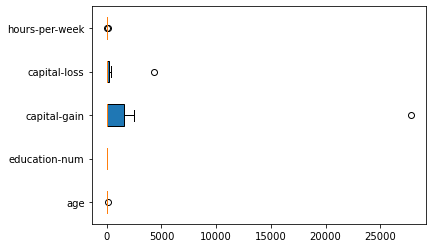

,age,education-num,capital-gain,capital-loss,hours-per-week
mean,38.585549,10.081815,584.980013,87.368227,40.440329
std,13.637984,2.571633,2507.006303,403.101833,12.346889
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,27828.000000,4356.000000,99.000000


In [140]:
plt.boxplot(data.describe().drop('count'),patch_artist=True,vert=0,labels=list(data.describe().columns))
plt.show()
data.describe().drop('count')

### Looking at the results, we see all numerical columns have reasonable range now.

### Checking for Missing Values 

In [141]:
print("Checking for N/A:",data.isna().sum().sum()) # there seems to be no N/A
print("Checking for null:",data.isnull().sum().sum()) # there seems to be no null values

Checking for N/A: 166
Checking for null: 166


In [142]:
for i in data.columns:
    print(i,"\n",data[i].unique()) #checks the unique values present in each features
    print()

age 
 [39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]

workclass 
 [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']

education 
 [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']

education-num 
 [13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]

marital-status 
 [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']

occupation 
 [' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' ' ?'
 ' Prot

#### It seems that missing values are added as ' ?'

#### What are the features that contain ' ?' and how many missing values?

In [143]:
missing_col = [] #columns that contain the missing values
for i in data.columns:
    if ' ?' in data[i].unique():
        # Gives the columns that contain missing values and their numbers
        print(i+": Missing Value ("+str(data[i].value_counts()[' ?'])+")") 
        missing_col.append(i) #appending columns with missing values

workclass: Missing Value (1836)
occupation: Missing Value (1843)
native-country: Missing Value (582)


#### Changing the missing value 

In [144]:
data[missing_col].head()

,workclass,occupation,native-country
0,State-gov,Adm-clerical,United-States
1,Self-emp-not-inc,Exec-managerial,United-States
2,Private,Handlers-cleaners,United-States
3,Private,Handlers-cleaners,United-States
4,Private,Prof-specialty,Cuba


### Changing categorical data to numerical

In [145]:
data.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0,40,Cuba,<=50K


In [146]:
data = data.drop('education',axis=1) #deleted the column 'education' as education-num serves the same purpose
data.head(5)

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0,40,United-States,<=50K
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0,13,United-States,<=50K
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0,40,United-States,<=50K
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0,40,United-States,<=50K
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0,40,Cuba,<=50K


In [147]:
LE = preprocessing.LabelEncoder() #using Label Encoder
LE.fit(data['sex'])
data.insert(loc=8, column='gender', value=LE.transform(data['sex'])) #adding 'gender' to column index 8
data = data.drop('sex',axis=1)# added numerical 'gender' and deleted categorical 'sex'
data.dtypes
data.head(20)

,age,workclass,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,1,2174.0,0,40,United-States,<=50K
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,1,0.0,0,13,United-States,<=50K
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,1,0.0,0,40,United-States,<=50K
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,1,0.0,0,40,United-States,<=50K
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,0,0.0,0,40,Cuba,<=50K
5,37,Private,14,Married-civ-spouse,Exec-managerial,Wife,White,0,0.0,0,40,United-States,<=50K
6,49,Private,5,Married-spouse-absent,Other-service,Not-in-family,Black,0,0.0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,9,Married-civ-spouse,Exec-managerial,Husband,White,1,0.0,0,45,United-States,>50K
8,31,Private,14,Never-married,Prof-specialty,Not-in-family,White,0,14084.0,0,50,United-States,>50K
9,42,Private,13,Married-civ-spouse,Exec-managerial,Husband,White,1,5178.0,0,40,United-States,>50K


In [148]:
# 1 represents greater than 50k while 0 represents less than or equal to 50k
LE.fit(data['salary'])
new_salary = LE.transform(data['salary'])
data = data.drop('salary',axis=1)# added numerical 'gender' and deleted categorical 'salary'
data.insert(loc=12, column='salary', value=new_salary) #adding 'salary' to column index 12
data.dtypes
data.head(20)

,age,workclass,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,1,2174.0,0,40,United-States,0
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,1,0.0,0,13,United-States,0
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,1,0.0,0,40,United-States,0
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,1,0.0,0,40,United-States,0
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,0,0.0,0,40,Cuba,0
5,37,Private,14,Married-civ-spouse,Exec-managerial,Wife,White,0,0.0,0,40,United-States,0
6,49,Private,5,Married-spouse-absent,Other-service,Not-in-family,Black,0,0.0,0,16,Jamaica,0
7,52,Self-emp-not-inc,9,Married-civ-spouse,Exec-managerial,Husband,White,1,0.0,0,45,United-States,1
8,31,Private,14,Never-married,Prof-specialty,Not-in-family,White,0,14084.0,0,50,United-States,1
9,42,Private,13,Married-civ-spouse,Exec-managerial,Husband,White,1,5178.0,0,40,United-States,1


In [149]:
print(data.dtypes.value_counts())
dtpye_df = data.dtypes.value_counts()
list(dtpye_df.index)
fig = px.pie(values=dtpye_df, names = ['object','int64','int32','float64'],width=400, height=400,hole=.5)
fig.show()

object     6
int64      4
int32      2
float64    1
dtype: int64


### Dealing with missing values
 1. remove the rows that contain the missing values (data_imp_del)
 2. fill missing values to median values (I prefer not to use mean values because having outliers might affect it) (data_imp_med)
 3. fill the missing values using 'from sklearn.impute import KNNImputer' (data_imp_knn)

In [150]:
data = data.replace(' ?',np.nan) #replacing ' ?' as N/A to ease the replace

In [151]:
isna_check = data.isna().sum().reset_index() #checking for na; if we replaced ' ?' correctly, we should see na values
print(isna_check)
only_na = isna_check[isna_check[0]>0]
fig = go.Figure(go.Bar(
            x=only_na['index'],
            y=only_na[0],
            orientation='v',
            marker=dict(
                color='rgba(58, 71, 80, 0.6)',\
                line=dict(color='rgba(58, 71, 80, 1.0)', width=3)
            )))
fig.update_layout(
    title='Number of N/As in the feature variables',
)
fig.show()

             index     0
0              age     0
1        workclass  1836
2    education-num     0
3   marital-status     0
4       occupation  1843
5     relationship     0
6             race     0
7           gender     0
8     capital-gain   166
9     capital-loss     0
10  hours-per-week     0
11  native-country   582
12          salary     0


#### Converting remaining object dataset into numericals

In [160]:
data_onehot = data
categorical_cols = data.dtypes[data.dtypes=='object'].index
for col in categorical_cols:
    col_onehot = pd.get_dummies(data[col], prefix=col,dtype='int64')
    data_onehot = pd.concat((data_onehot, col_onehot), axis=1).drop(col, axis=1)
data_onehot = data_onehot.drop('salary',axis=1)
y = data['salary'] #putting y separately
print(data_onehot.shape)
print(data_onehot.dtypes[data_onehot.dtypes=='object'].index) # No object in the features list
data_onehot.columns

(32537, 87)
Index([], dtype='object')


Index(['age', 'education-num', 'gender', 'capital-gain', 'capital-loss',
       'hours-per-week', 'workclass_ Federal-gov', 'workclass_ Local-gov',
       'workclass_ Never-worked', 'workclass_ Private',
       'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc',
       'workclass_ State-gov', 'workclass_ Without-pay',
       'marital-status_ Divorced', 'marital-status_ Married-AF-spouse',
       'marital-status_ Married-civ-spouse',
       'marital-status_ Married-spouse-absent',
       'marital-status_ Never-married', 'marital-status_ Separated',
       'marital-status_ Widowed', 'occupation_ Adm-clerical',
       'occupation_ Armed-Forces', 'occupation_ Craft-repair',
       'occupation_ Exec-managerial', 'occupation_ Farming-fishing',
       'occupation_ Handlers-cleaners', 'occupation_ Machine-op-inspct',
       'occupation_ Other-service', 'occupation_ Priv-house-serv',
       'occupation_ Prof-specialty', 'occupation_ Protective-serv',
       'occupation_ Sales', 'occupatio

In [165]:
print(data_onehot.dtypes.value_counts())
dtpye_df = data_onehot.dtypes.value_counts()
fig = px.pie(values=dtpye_df, names = ['int64','int32','float64'],width=400, height=400,hole=.5)
fig.show()

int64      85
int32       1
float64     1
dtype: int64


In [166]:
data_onehot.dtypes[data_onehot.dtypes=='int32']

gender    int32
dtype: object

In [167]:
data_onehot['gender'] = data_onehot['gender'].astype('int64') #changing the dtype of gender from int32 to int64

# EDA

In [168]:
data.columns

Index(['age', 'workclass', 'education-num', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'capital-gain', 'capital-loss',
       'hours-per-week', 'native-country', 'salary'],
      dtype='object')

### How does age affect the salary?

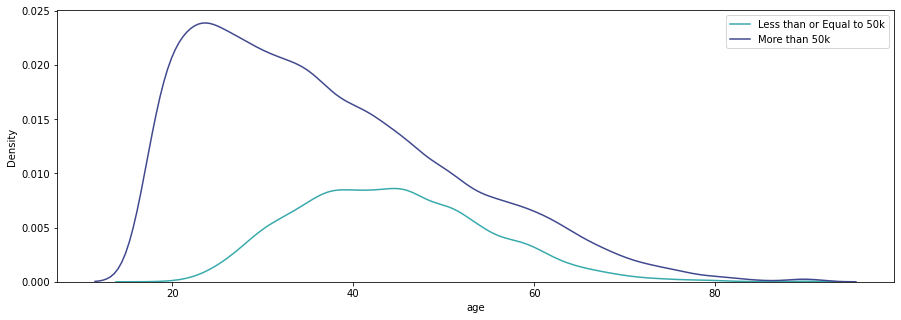

In [187]:
plt.figure(figsize=(15,5))
sns.kdeplot(data=data , x='age' ,hue='salary', palette='mako')
plt.legend(labels=['Less than or Equal to 50k', 'More than 50k'])
plt.show()

#### At first glance, it is odd that 19 years old is earning more than 50K but it is normal nowaday(influencers?)
#### More than 61 years old is still earning is odd as well but let keep it for the model

### How does education affect the salary? 

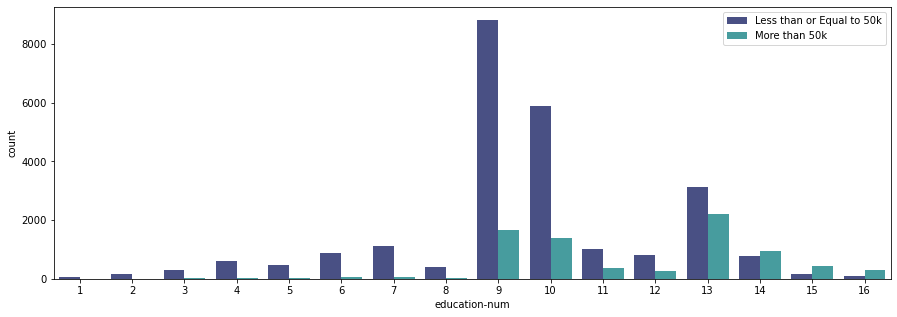

In [211]:
plt.figure(figsize=(15,5))
sns.countplot(data =data , x='education-num', hue='salary', palette='mako')
plt.legend(labels=['Less than or Equal to 50k', 'More than 50k'])
plt.show()

#### It seems education starts to affect salary only at higher level. Starting from Bachelors (14)

### What kind of job offers higher salary?

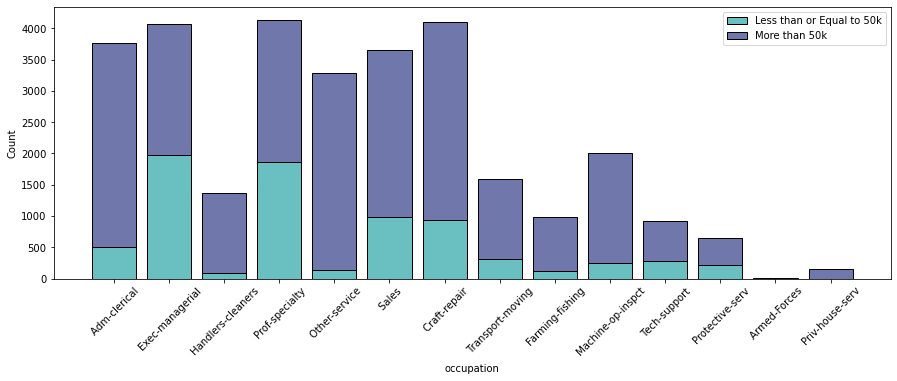

In [210]:
plt.figure(figsize=(15,5))
sns.histplot(data =data , x='occupation', hue='salary', palette='mako', multiple='stack',shrink=0.8)
plt.xticks(rotation=45)
plt.legend(labels=['Less than or Equal to 50k', 'More than 50k'])
plt.show()

### Does race have anything to do with salary?

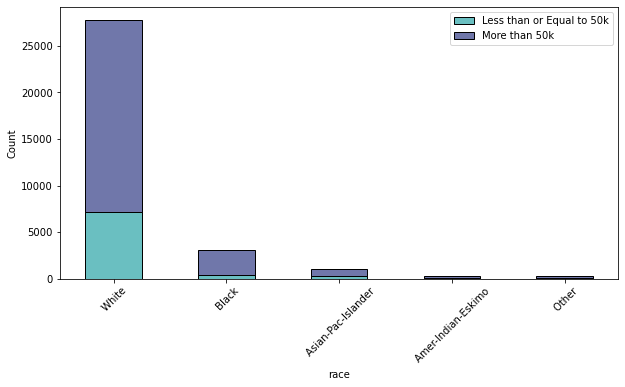

In [208]:
plt.figure(figsize=(10,5))
sns.histplot(data, x='race', hue='salary',palette='mako',multiple='stack',shrink=.5)
plt.xticks(rotation=45)
plt.legend(labels=['Less than or Equal to 50k', 'More than 50k'])
plt.show()

#### We find white race has larger quantity in the market

### Does relationships affect the salary?

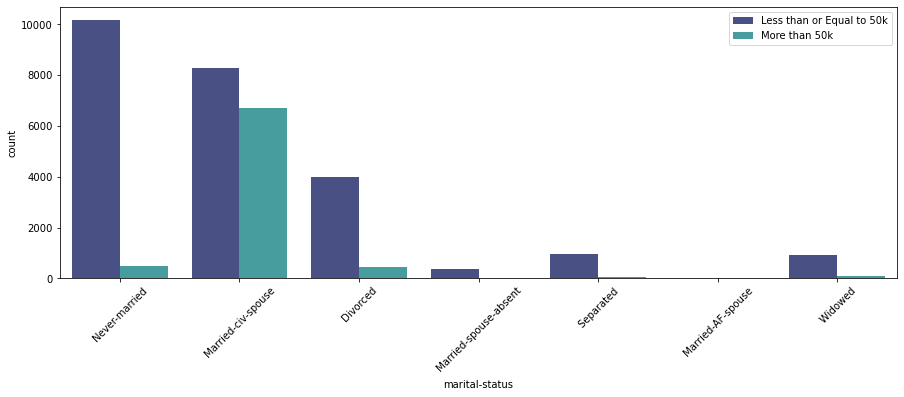

In [193]:
plt.figure(figsize=(15,5))
sns.countplot(data=data , x='marital-status' ,hue='salary', palette='mako')
plt.xticks(rotation=45)
plt.legend(labels=['Less than or Equal to 50k', 'More than 50k'])
plt.show()

#### It seems most of the 50K salary group are married with spouse

### Looking at the correlation

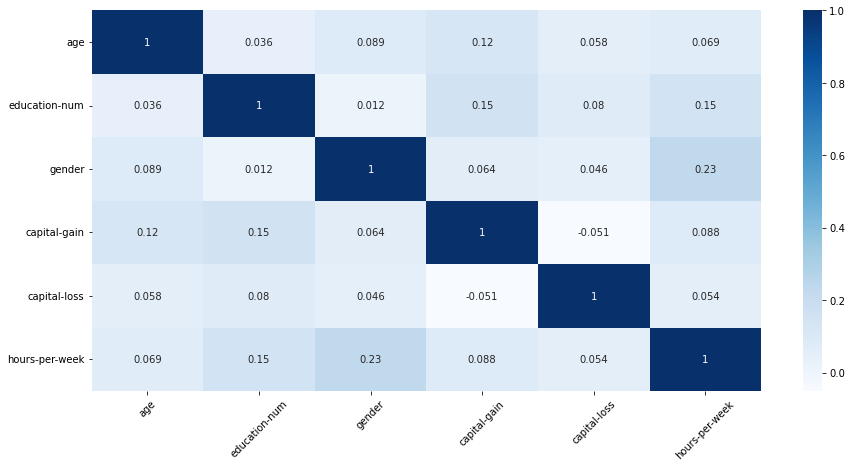

In [111]:
cor = data.corr()
# print(cor) #here we are looking at correlation amongst few columns
plt.figure(figsize=(15,7))
sns.heatmap(cor, annot=True, cmap='Blues')
plt.xticks(rotation=45)
plt.show()

### Normalization of the features

In [36]:
from sklearn import preprocessing
col_name = data_onehot.columns
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(data_onehot)
data_processed = pd.DataFrame(np_scaled, columns=col_name)
data_processed

,age,education-num,gender,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,0.301370,0.800000,1.0,0.078123,0.0,0.397959,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.452055,0.800000,1.0,0.000000,0.0,0.122449,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.287671,0.533333,1.0,0.000000,0.0,0.397959,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.493151,0.400000,1.0,0.000000,0.0,0.397959,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.150685,0.800000,0.0,0.000000,0.0,0.397959,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32532,0.136986,0.733333,0.0,0.000000,0.0,0.377551,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
32533,0.315068,0.533333,1.0,0.000000,0.0,0.397959,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
32534,0.561644,0.533333,0.0,0.000000,0.0,0.397959,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
32535,0.068493,0.533333,1.0,0.000000,0.0,0.193878,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


#### Rows with missing values deleted

In [37]:
# in this dataset, we deleted the rows that contained the N/A values
data_processed1 = pd.concat((data_processed,y),axis=1) 
print("Inital number of N/A:",data_processed1.isna().sum().sum(),end='\n\n') #display if na is present
data_imp_del = data_processed1.dropna() #drops rows containing na
print('Inital data:',data_processed1.shape) #intial dataset without any deleted rows
print('Final Data after deleted rows:',data_imp_del.shape) # final dataset after using dropna
print("Deleted rows:",data.shape[0]-data_imp_del.shape[0])
print("Numer of N/A:",data_imp_del.isna().sum().sum(),end='\n\n') #display if na is present
print("Count of dtypes:")
print(data_imp_del.dtypes.value_counts())

Inital number of N/A: 2278

Inital data: (32561, 88)
Final Data after deleted rows: (32347, 88)
Deleted rows: 190
Numer of N/A: 0

Count of dtypes:
float64    87
object      1
dtype: int64


In [38]:
data_imp_del.columns #note only this dataset has y inside it because we had to remove rows
y_del = data_imp_del['salary']
data_imp_del = data_imp_del.drop('salary',axis=1)
data_imp_del.columns

Index(['age', 'education-num', 'gender', 'capital-gain', 'capital-loss',
       'hours-per-week', 'workclass_ Federal-gov', 'workclass_ Local-gov',
       'workclass_ Never-worked', 'workclass_ Private',
       'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc',
       'workclass_ State-gov', 'workclass_ Without-pay',
       'marital-status_ Divorced', 'marital-status_ Married-AF-spouse',
       'marital-status_ Married-civ-spouse',
       'marital-status_ Married-spouse-absent',
       'marital-status_ Never-married', 'marital-status_ Separated',
       'marital-status_ Widowed', 'occupation_ Adm-clerical',
       'occupation_ Armed-Forces', 'occupation_ Craft-repair',
       'occupation_ Exec-managerial', 'occupation_ Farming-fishing',
       'occupation_ Handlers-cleaners', 'occupation_ Machine-op-inspct',
       'occupation_ Other-service', 'occupation_ Priv-house-serv',
       'occupation_ Prof-specialty', 'occupation_ Protective-serv',
       'occupation_ Sales', 'occupatio

#### Missing values filled with median

In [39]:
# in this dataset, we replace missing (N/A) values with median values; need to change data to numerical from categorical
print("Inital number of N/A:",data_processed.isna().sum().sum(),end='\n\n') #display if na is present
data_imp_med = data_processed.fillna(data_onehot.median()) #replace missing values with median values
print('Inital data:',data_processed.shape) #intial dataset
print('Final data:',data_imp_med.shape) # final dataset after imputting
print("Deleted rows:",data.shape[0]-data_imp_med.shape[0],end='\n\n')
print("Numer of N/A:",data_imp_med.isna().sum().sum(),end='\n\n') #display if na is present

Inital number of N/A: 166

Inital data: (32537, 87)
Final data: (32537, 87)
Deleted rows: 0

Numer of N/A: 0



#### Missing values imputted using KNN classifer

In [40]:
# in this dataset, we replace missing (N/A) values using values from KNN classifer; need to change data to numerical from categorical
print("Inital number of N/A:",data_processed.isna().sum().sum(),end='\n\n') #display if na is present
col_name = data_processed.columns
imputer = KNNImputer()
data_imp_knn = pd.DataFrame(imputer.fit_transform(data_processed),columns=col_name,dtype='float64') #replace missing values with values from knn model
print(data_imp_knn.dtypes.value_counts())
print('Inital data:',data_processed.shape) #intial dataset
print('Final data:',data_imp_med.shape) # final dataset after imputting
print("Deleted rows:",data.shape[0]-data_imp_knn.shape[0],end='\n\n')
print("Numer of N/A:",data_imp_knn.isna().sum().sum(),end='\n\n') #display if na is present
data_imp_knn.head()

Inital number of N/A: 166

float64    87
dtype: int64
Inital data: (32537, 87)
Final data: (32537, 87)
Deleted rows: 0

Numer of N/A: 0



,age,education-num,gender,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,0.301370,0.800000,1.0,0.078123,0.0,0.397959,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.452055,0.800000,1.0,0.000000,0.0,0.122449,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.287671,0.533333,1.0,0.000000,0.0,0.397959,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.493151,0.400000,1.0,0.000000,0.0,0.397959,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.150685,0.800000,0.0,0.000000,0.0,0.397959,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Repeated Stratified K Fold application with SMOTE for Classification model

In [41]:
from sklearn.datasets import make_classification
# define dataset
X_toy, y_toy = make_classification(n_samples=1000, n_features=2, n_redundant=0,
    n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
#print(X,y)
X_t, y_t = make_classification(n_samples=1000, n_features=3, n_redundant=0,
    n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=0)
X_to, y_to = make_classification(n_samples=1000, n_features=3, n_redundant=0,
    n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=2)
print(X_to)

[[-0.26998856 -0.52149472  0.82987444]
 [-1.65488614 -1.4332651   1.00232799]
 [-1.41492489  1.461142    0.63977579]
 ...
 [-0.85303054 -0.77976473  0.68705928]
 [-1.67767114 -1.12286124  3.48171245]
 [-0.71540695  0.91278733  2.26337732]]


In [217]:
#using multiple classification models
models = ['LogisticRegression', 'RidgeClassifier', 'KNeighborsClassifier',\
          'SVC', 'BaggingClassifier', 'RandomForestClassifier', 'GradientBoostingClassifier']
model_info = pd.DataFrame(columns=['Model name','Score'])
#balancing the dataset and splittling it into train and test dataset
def train_test_smote(X,y):
    #pca, here we maintain variance of 85%
    pca = PCA(n_components = 0.85)
    pca.fit(X)
    #transform adult dataset
    #uses principal component analysis to reduce the size of the dimension
    adult_pca = pca.transform(X)
    #spliting the data into test and train dataset
    X_train, X_test, y_train, y_test = train_test_split(adult_pca, y, test_size=0.2, random_state=1)
    smt = SMOTE(random_state=42)
    #balancing the target data using synthetic data
    X_bal, y_bal = smt.fit_resample(X_train, y_train)
    fig = px.pie(values=pd.DataFrame(y_bal).value_counts(), names=['Less than or equal to 50K','More than 50K'], width=800, height=400, title="Data Check for target variable")
    fig.show()
    return X_bal,X_test,y_bal,y_test

def model_creator(model, X_train, X_test, y_train,y_test, param_grid={}): #empty param_grid means default parameters are added
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=0)
    #n_jobs -1 allows to run all processors
    grid_search_cv = GridSearchCV(estimator=model(),param_grid=param_grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
    model = grid_search_cv.fit(X_train, y_train)
#     print("Train Score",model.score(X_train, y_train))
#     print("Test Score",model.score(X_test,y_test))
    y_predict = model.predict(X_test)
    # summarize results
    best_param = model.best_params_
    if best_param == {}:
        best_param = 'default'
    else:
        print("Best: %f with %s parameters" % (model.best_score_, best_param))
#     means = model.cv_results_['mean_test_score']
#     stds = model.cv_results_['std_test_score']
#     params = model.cv_results_['params']
#     for mean, stdev, param in zip(means, stds, params):
#         print("%f (std of %f): params of %r" % (mean, stdev, param))
    return model.best_score_
    # Model Accuracy, how often is the classifier correct?
    #return metrics.accuracy_score(y_test, y_predict)
#     try:
#         score = cross_val_score(model(max_iter=100000),X, y,cv=cv,scoring='accuracy')
#     except:
#         score = cross_val_score(model(),X, y,cv=cv,scoring='accuracy')
#     return score.mean()

def model_compare_lineplot(li):
    plt.figure(figsize=(15,5))
    predict_scores = pd.DataFrame(li,columns=['Classification Models','Scores','Dataset'])
    print(predict_scores)
    compare_graph = sns.lineplot(data=predict_scores,x='Classification Models', y='Scores', hue='Dataset',\
             palette=sns.color_palette("mako_r",3),legend='brief')
    compare_graph.set_xticklabels(labels=models,rotation=45)
    compare_graph.set(title = 'Comparison of different algorithms in different datasets')
    plt.grid()
    plt.show()

In [218]:
legend_name = ['Rows deleted','Median imputed','Imputed via KNNClassifer']
li = []
#data_li = [[data_imp_del,y_del],[data_imp_med,y],[data_imp_knn,y]]
data_li = [[X_t,y_t],[X_toy,y_toy],[X_to,y_to]]
li_index =0
for dataset in data_li:
    print(legend_name[li_index])
    X_train,X_test,y_train,y_test = train_test_smote(dataset[0],dataset[1])
    for model in models: 
        score = model_creator(eval(model),X_train,X_test,y_train,y_test)
        print(model+':',score)
        li.append([model,score,legend_name[li_index]])
    li_index+=1
    print()

Rows deleted


LogisticRegression: 0.6864825832900744
RidgeClassifier: 0.6879567144511441
KNeighborsClassifier: 0.8761297235421741
SVC: 0.8392478270707717
BaggingClassifier: 0.8697966164863102
RandomForestClassifier: 0.8759127633803192
GradientBoostingClassifier: 0.8695856460221751

Median imputed


LogisticRegression: 0.8906540749910156
RidgeClassifier: 0.8771672722916584
KNeighborsClassifier: 0.8864439830158795
SVC: 0.8938186319530408
BaggingClassifier: 0.8478789814851788
RandomForestClassifier: 0.8495627520664456
GradientBoostingClassifier: 0.8866576155678899

Imputed via KNNClassifer


LogisticRegression: 0.9896884026141702
RidgeClassifier: 0.972012804642681
KNeighborsClassifier: 0.9913708421514994
SVC: 0.9926340028484341
BaggingClassifier: 0.9960028750549057
RandomForestClassifier: 0.9964234849392377
GradientBoostingClassifier: 0.9949506848221058



         Classification Models    Scores                   Dataset
0           LogisticRegression  0.686483              Rows deleted
1              RidgeClassifier  0.687957              Rows deleted
2         KNeighborsClassifier  0.876130              Rows deleted
3                          SVC  0.839248              Rows deleted
4            BaggingClassifier  0.870224              Rows deleted
5       RandomForestClassifier  0.876542              Rows deleted
6   GradientBoostingClassifier  0.869586              Rows deleted
7           LogisticRegression  0.890654            Median imputed
8              RidgeClassifier  0.877167            Median imputed
9         KNeighborsClassifier  0.886444            Median imputed
10                         SVC  0.893819            Median imputed
11           BaggingClassifier  0.849775            Median imputed
12      RandomForestClassifier  0.849563            Median imputed
13  GradientBoostingClassifier  0.886658            Median imp

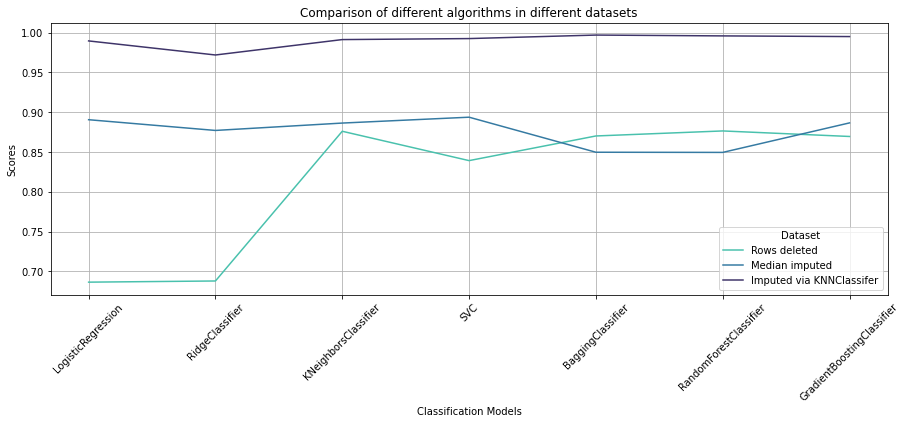

In [216]:
model_compare_lineplot(li)

#### Looking at the results obtained from different imputation, we find deleting the rows if missing data to perform worse. The other two imputters perform relatively similar. But imputation using KNN Classifier seems to perform slightly better.
#### So, in hyperparameters, we shall be using KNN imputer applied dataset

## Hypertuning the parameters

In [ ]:
# parameters for the models
# Logistic Regression
# solver can be helpful to get different performances in the model output
# penalty is regularization. Since, we have already done regularization, it is not necessary but lets keep it for now
# C controls the penalty strength
logr = {
    'solver': ['newton-cg', 'lbfgs', 'liblinear'],
    'penalty': ['none', 'l1', 'l2', 'elasticnet'],
    'C': [1000, 100, 10, 1.0, 0.1, 0.01]
}

# Ridge Classifier
# important parameter: alpha (regularization strength)
ridgec = {
    'alpha': [1e-15, 1e-10, 1e-8, 1e-3, 1e-2, 1, 10, 20, 30, 40, 50, 100]
}

# KNeighborsClassifier
# odd numbers for n_neighbors
# weight is used in prediction. Uniform means each points have uniform weight\ 
# while distance means the weight changes with distance
# metric is distance metrics for calculating the distance
# algorithm is for different algorithms to compute nearest neighbors
knc = {
    'n_neighbors': range(1, 21, 2),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [30, 40, 50],
    'p': [1,2]
}

# Support Vector Classifier
# kernel controls the way input variables will be projected
# C is penalty. It affects the shape of the resulting regions of the classes
# gamma is scale by default. Value : 1 / (n_features * X.var()) 
# degree is only for poly for degree of polynomial.
svc_ = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'C': [50, 10, 1.0, 0.1, 0.01],
    'gamma': ['scale'],
    'degree': [1, 2, 3, 4, 5]
}

# Bagging Classifier
# ideally n_estimator is increased in log values and until score doesn't improve
# max_samples: sample size to draw from X to train model, default =1
# max features: featues size to draw from X to train model, default=1
bgc = {
    'n_estimators': [10, 100, 1000, 10000],
    'max_features': [0.5, 0.7, 1.0],
    'max_samples': [0.5, 0.7, 1.0]
}

# RandomForestClassifier
# ideally n_estimator is increased in log values and until score doesn't improve
# max_depth is None by default. So, tree creates nodes until all leaves are pure or contain less than min_samples_leaf
# minimum sample size to split an internal node
# bootstrap if False, the whole dataset is used to build each tree.
rfc = {
    'n_estimators': [10, 100, 1000],
    'max_features': ['sqrt', 'log2'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

#Gradient Boosting Classifier
# learning_rate (shrinkage), if overfitting lower shrinkage and underfitting increase learning rate
# n_estimator (number of trees)
# max_depth limits number of nodes in a tree
# subsample if < 1.0 results in Stochastic Gradient Boosting
gbc = {
    'n_estimators': [10, 100, 1000],
    'learning_rate': [0.001, 0.01, 0.1],
    'subsample': [0.5, 0.7, 1.0],
    'max_depth': [3, 7, 9]
}
hypertuned_li = []
# models = ['LogisticRegression', 'RidgeClassifier', 'KNeighborsClassifier',\
#           'SVC', 'BaggingClassifier', 'RandomForestClassifier', 'GradientBoostingClassifier']
models_param = [logr, ridgec, knc, svc_, bgc, rfc, gbc]
X_train1,X_test1,y_train1,y_test1 = train_test_smote(X_toy,y_toy)
for model_indx in range(len(models_param)):
    #print(models[model_indx],models_param[model_indx])
    score = model_creator(eval(models[model_indx]),X_train1,X_test1,\
                          y_train1,y_test1 ,param_grid=models_param[model_indx])
    print(models[model_indx]+':',score)
    print()
    hypertuned_li.append([models[model_indx],score,"KNN imputed dataset"])

In [ ]:
model_compare_lineplot(hypertuned_li)

### After finding the best model and best parameters, we will rerun the best model and show confusion matrix

In [13]:
def best_model_creator(model, X_train, X_test, y_train,y_test, param_grid={}): #empty param_grid means default parameters are added
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=0)
    #n_jobs -1 allows to run all processors
    grid_search_cv = GridSearchCV(estimator=model(),param_grid=param_grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
    model = grid_search_cv.fit(X_train, y_train)
    y_predict = model.predict(X_test)
    # summarize results
    best_param = model.best_params_
    if best_param == {}:
        best_param = 'default'
    print("Best: %f with %s parameters" % (model.best_score_, best_param))
    #Model Accuracy, how often is the classifier correct?
    print(metrics.accuracy_score(y_test, y_predict))
    cfm = confusion_matrix(y_test,ypredict)
    sns.heatmap(cfm,annot=True,fmt='.0f',cmap='Blues')
    #print(cfm)
    target_names = ['Less than or Equal to 50k','More than 50K']
    print(classification_report(y_test, y_predict, target_names=target_names))
    return model.best_score_


In [ ]:
best_param = 
X_train, X_test, y_train,y_test = train_test_smote(X,y)
best_model_creator(model, X_train, X_test, y_train,y_test, param_grid=best_param)

In [33]:
# create dataframe from data in X_train
# label the columns using the strings in iris_dataset.feature_names

import pandas as pd

iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)

# create a scatter matrix from the dataframe, colour by y_train

pd.plotting.scatter_matrix(iris_dataframe, c=y_train, figsize=(15, 15),
                          marker='o', hist_kwds={'bins': 20}, s=60,
                          alpha=.8)

NameError: name 'X_train' is not defined